<a href="https://colab.research.google.com/github/ravikumawat7716/Taxi-Fare-Prediction-Using-Machine-Learning/blob/main/colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For  , here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For  , running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading

In [204]:
!git clone https://github.com/ravikumawat7716/Taxi-Fare-Prediction-Using-Machine-Learning.git

fatal: destination path 'Taxi-Fare-Prediction-Using-Machine-Learning' already exists and is not an empty directory.


In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Loading the datasets
# training_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
# test_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
training_data = pd.read_csv('/content/Taxi-Fare-Prediction-Using-Machine-Learning/data/train.csv')
test_data = pd.read_csv('/content/Taxi-Fare-Prediction-Using-Machine-Learning/data/test.csv')

In [206]:
# 'total_amount' is our target variable
X_train = training_data.drop(columns=['total_amount'])
Y_train = training_data['total_amount']

X_test = test_data

# Data Exploration

In [207]:
training_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [208]:
X_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,2.5,0.0


In [209]:
print("training_data Shape : ", training_data.shape)
print("X_train Shape : ",  X_train.shape)
print("Y_train Shape : ", Y_train.shape)
print("X_test Shape : ", X_test.shape)

training_data Shape :  (175000, 17)
X_train Shape :  (175000, 16)
Y_train Shape :  (175000,)
X_test Shape :  (50000, 16)


In [210]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  congestion_surcharge   168923 non-nu

In [211]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [212]:
X_train.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [213]:
X_test.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

passenger_count , RatecodeID , store_and_fwd_flag , congestion_surcharge , Airport_fee have null values. So Imputation is required.

In [214]:
X_train['Airport_fee'].unique()

array([ 0.  ,  1.75,   nan, -1.75])

In [215]:
X_train['passenger_count'].unique()

array([ 1.,  3.,  0.,  2., nan,  4.,  6.,  5.,  8.,  9.])

## Univariate Analysis

In [216]:
df = training_data

In [217]:

ratecode_counts = test_data['RatecodeID'].value_counts()

# Print the counts for specific values
print("Count of RatecodeID 1:", ratecode_counts.get(1, 0))
print("Count of RatecodeID 2:", ratecode_counts.get(2, 0))
print("Count of RatecodeID 3:", ratecode_counts.get(3, 0))
print("Count of RatecodeID 4:", ratecode_counts.get(4, 0))
print("Count of RatecodeID 5:", ratecode_counts.get(5, 0))
print("Count of RatecodeID 6:", ratecode_counts.get(6, 0))
print("Count of RatecodeID 99:", ratecode_counts.get(99, 0))


Count of RatecodeID 1: 45373
Count of RatecodeID 2: 1956
Count of RatecodeID 3: 216
Count of RatecodeID 4: 123
Count of RatecodeID 5: 314
Count of RatecodeID 6: 1
Count of RatecodeID 99: 238


In [218]:

ratecode_counts = training_data['RatecodeID'].value_counts()

# Print the counts for specific values
print("Count of RatecodeID 1:", ratecode_counts.get(1, 0))
print("Count of RatecodeID 2:", ratecode_counts.get(2, 0))
print("Count of RatecodeID 3:", ratecode_counts.get(3, 0))
print("Count of RatecodeID 4:", ratecode_counts.get(4, 0))
print("Count of RatecodeID 5:", ratecode_counts.get(5, 0))
print("Count of RatecodeID 6:", ratecode_counts.get(6, 0))
print("Count of RatecodeID 99:", ratecode_counts.get(99, 0))

Count of RatecodeID 1: 158652
Count of RatecodeID 2: 7314
Count of RatecodeID 3: 727
Count of RatecodeID 4: 446
Count of RatecodeID 5: 1036
Count of RatecodeID 6: 0
Count of RatecodeID 99: 748


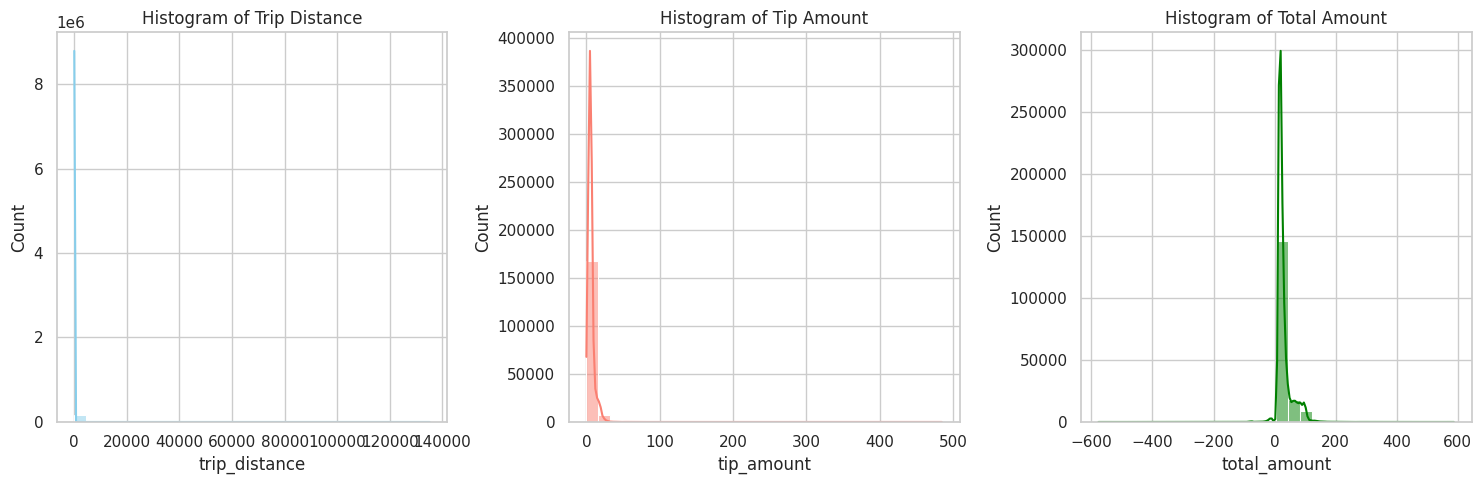

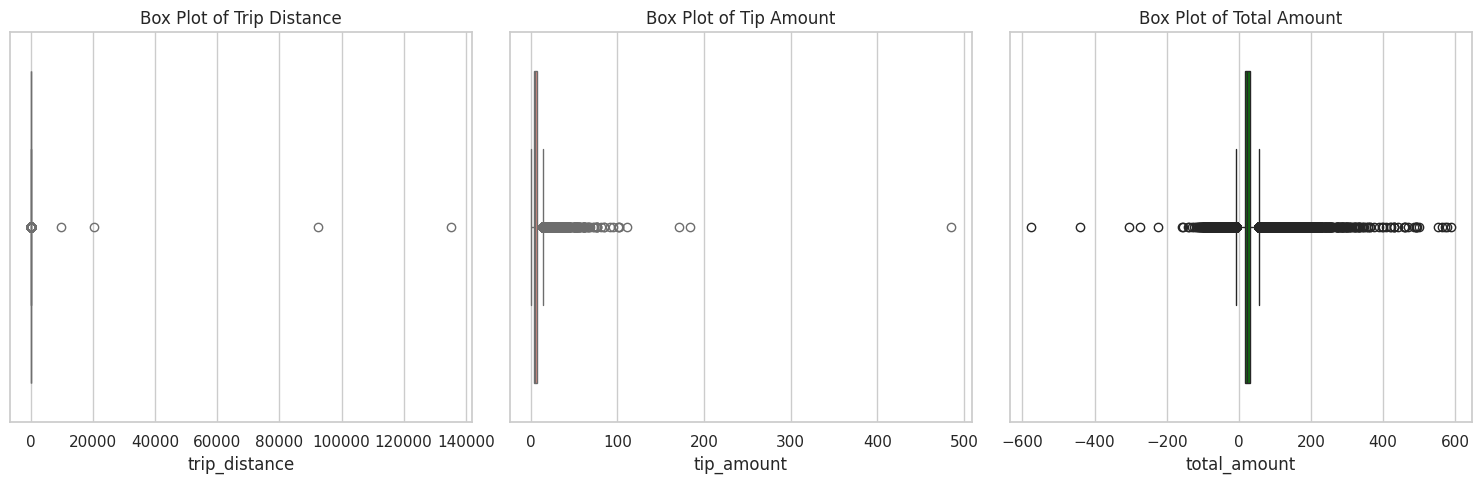

<ipython-input-219-25048e85414e>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VendorID', data=df, palette='viridis')
<ipython-input-219-25048e85414e>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RatecodeID', data=df, palette='viridis')
<ipython-input-219-25048e85414e>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=df, palette='viridis')


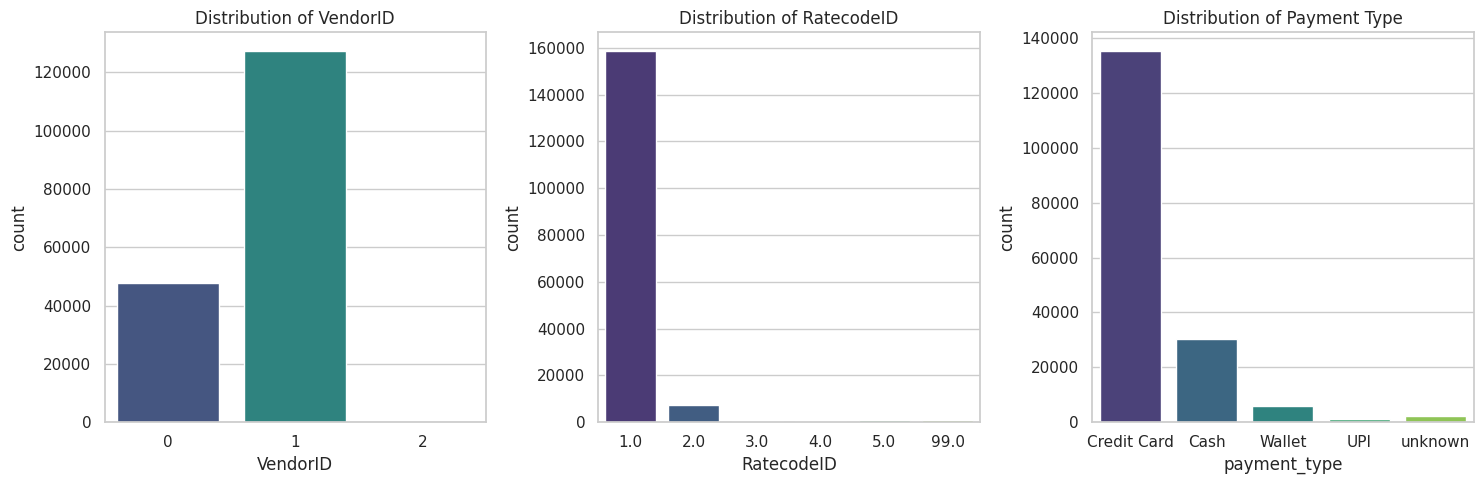

In [219]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")


# a. Numeric Variables

## Histograms
plt.figure(figsize=(15, 5))

# Histogram for trip_distance
plt.subplot(1, 3, 1)
sns.histplot(df['trip_distance'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Trip Distance')

# Histogram for tip_amount
plt.subplot(1, 3, 2)
sns.histplot(df['tip_amount'], bins=30, kde=True, color='salmon')
plt.title('Histogram of Tip Amount')

#  Histogram for total_amount
plt.subplot(1, 3, 3)
sns.histplot(df['total_amount'], bins=30, kde=True, color='green')
plt.title('Histogram of Total Amount')

plt.tight_layout()
plt.show()

## Box Plots
plt.figure(figsize=(15, 5))

#   Box Plot for trip_distance
plt.subplot(1, 3, 1)
sns.boxplot(x=df['trip_distance'], color='skyblue')
plt.title('Box Plot of Trip Distance')

#   Box Plot for tip_amount
plt.subplot(1, 3, 2)
sns.boxplot(x=df['tip_amount'], color='salmon')
plt.title('Box Plot of Tip Amount')

#   Box Plot for total_amount
plt.subplot(1, 3, 3)
sns.boxplot(x=df['total_amount'], color='green')
plt.title('Box Plot of Total Amount')

plt.tight_layout()
plt.show()

# b. Categorical Variables

## Bar Charts
plt.figure(figsize=(15, 5))

#   Bar Chart for VendorID
plt.subplot(1, 3, 1)
sns.countplot(x='VendorID', data=df, palette='viridis')
plt.title('Distribution of VendorID')

#   Bar Chart for RatecodeID
plt.subplot(1, 3, 2)
sns.countplot(x='RatecodeID', data=df, palette='viridis')
plt.title('Distribution of RatecodeID')

#  Bar Chart for payment_type
plt.subplot(1, 3, 3)
sns.countplot(x='payment_type', data=df, palette='viridis')
plt.title('Distribution of Payment Type')

plt.tight_layout()
plt.show()


This Graphs show the distribution of data.
* VendorID - only 2 values 0 & 1 , 1 is used the most
* RatecodeID - majority of times 1 is used.
* Payment Type - Majority of times Credit Card is used.


# Preprocessing

In [220]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [221]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  congestion_surcharge   168923 non-nu

In [222]:
X_train['store_and_fwd_flag'].unique()

array(['N', nan, 'Y'], dtype=object)

In [223]:
X_train['payment_type'].unique()

array(['Credit Card', 'Cash', 'Wallet', 'UPI', 'unknown'], dtype=object)

In [224]:
X_train['RatecodeID'].unique()

array([ 1., 99.,  3., nan,  2.,  5.,  4.])

 ### train test split for creating validation dataset from training data

In [225]:
from sklearn.model_selection import train_test_split

x_train , x_val , y_train , y_val = train_test_split(X_train , Y_train , test_size=0.20, random_state=42)

### Preprocessing using a Pipeline
Preprocessing is implemented uisng a pipeline.
Preprocessing Steps : -
1. Imputation -
    * Simple Imputer is used for imputation -
        *      All the missing values of the Numeric Columns are replaced by the mean of the respective column
        *     All the missing values of the Categorical columns are replaced by the most frequent value of the respective column
        *      RateCodeID have numeric data type & Graphs shows that majority of values are 1 , so constant imputation strategy is used & all the null values are replaced by 1.   
    
2. Encoding -
    * One Hot Encoder is used to convert categorical columns into numeric features by making columns for all the unique values of the respective feature & filling 1 for presence of the value & 0 for absence of the particular unique value.


In [226]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Define the transformers for numerical and categorical features
numeric_features = ['passenger_count', 'congestion_surcharge', 'Airport_fee']
categorical_features_imputer = ['store_and_fwd_flag']
constant_features_imputer = ['RatecodeID']
categorical_features_encoder = ['store_and_fwd_flag', 'payment_type']

numeric_transformer = SimpleImputer(missing_values=np.nan, strategy='mean')
constant_imputer = SimpleImputer(strategy='constant', fill_value=1)
categorical_transformer_imputer = SimpleImputer(missing_values=np.nan , strategy='most_frequent')
categorical_transformer_encoder = OneHotEncoder(sparse_output=False, drop='first')



# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical_imputer', categorical_transformer_imputer, categorical_features_imputer),
        ('constant_imputer', constant_imputer,constant_features_imputer),
        ('categorical_encoder', categorical_transformer_encoder, categorical_features_encoder)
    ],
    remainder='passthrough', verbose_feature_names_out=False
)



# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


x_train_preprocessed = pipeline.set_output(transform= "pandas").fit_transform(x_train) #training data
x_val_preprocessed = pipeline.set_output(transform= "pandas").transform(x_val) # validation data
X_test_preprocessed = pipeline.set_output(transform= "pandas").transform(X_test) # test data


In [227]:
X_test_preprocessed['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [228]:
X_test_preprocessed.info()
x_train_preprocessed.info()
x_val_preprocessed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   passenger_count           50000 non-null  float64
 1   congestion_surcharge      50000 non-null  float64
 2   Airport_fee               50000 non-null  float64
 3   store_and_fwd_flag        50000 non-null  object 
 4   RatecodeID                50000 non-null  float64
 5   store_and_fwd_flag_Y      50000 non-null  float64
 6   store_and_fwd_flag_nan    50000 non-null  float64
 7   payment_type_Credit Card  50000 non-null  float64
 8   payment_type_UPI          50000 non-null  float64
 9   payment_type_Wallet       50000 non-null  float64
 10  payment_type_unknown      50000 non-null  float64
 11  VendorID                  50000 non-null  int64  
 12  tpep_pickup_datetime      50000 non-null  object 
 13  tpep_dropoff_datetime     50000 non-null  object 
 14  trip_d

In [229]:
x_train_preprocessed = x_train_preprocessed.drop(['store_and_fwd_flag_nan', 'store_and_fwd_flag'],axis=1)
x_val_preprocessed = x_val_preprocessed.drop(['store_and_fwd_flag_nan', 'store_and_fwd_flag'],axis=1)
X_test_preprocessed = X_test_preprocessed.drop(['store_and_fwd_flag_nan', 'store_and_fwd_flag'],axis=1)

In [230]:
x_train_preprocessed.sample(15)

,passenger_count,congestion_surcharge,Airport_fee,RatecodeID,store_and_fwd_flag_Y,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge
26338,2.000000,2.500000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,1,2023-06-29 01:04:42,2023-06-29 00:53:20,1.12,75,151,1.00,3.822031,0.00,1.0
95132,1.359051,2.248259,0.15936,1.0,0.0,0.0,0.0,1.0,0.0,1,2023-06-28 22:04:36,2023-06-28 21:47:10,1.14,106,68,0.00,3.774559,0.00,1.0
12622,1.000000,2.500000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,1,2023-06-28 22:58:59,2023-06-28 22:35:13,2.57,121,254,1.00,6.423973,0.00,1.0
32277,1.000000,2.500000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,0,2023-06-30 15:09:34,2023-06-30 15:36:17,4.30,44,89,2.50,11.765220,0.00,1.0
4091,1.000000,2.500000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,0,2023-06-30 07:37:15,2023-06-30 07:35:33,1.80,161,251,2.50,7.809210,0.00,1.0
170761,1.000000,2.500000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,1,2023-06-30 17:00:08,2023-06-30 18:06:35,1.43,168,103,2.50,5.584246,0.00,1.0
110583,1.000000,2.500000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,1,2023-06-29 23:47:24,2023-06-29 23:03:42,3.54,223,261,1.00,7.097922,0.00,1.0
17627,1.000000,2.500000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,1,2023-06-29 11:53:00,2023-06-29 12:23:54,0.24,195,203,0.00,3.628567,0.00,1.0
163604,1.000000,2.500000,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,0,2023-06-30 12:38:02,2023-06-30 13:15:31,0.40,215,150,2.50,3.460525,0.00,1.0
97642,1.000000,2.500000,1.75000,1.0,0.0,1.0,0.0,0.0,0.0,0,2023-06-30 20:19:30,2023-06-30 20:22:57,8.80,251,188,10.25,9.566425,6.55,1.0


## Feature Engineering

In [231]:
x_train_preprocessed['tpep_pickup_datetime'] = pd.to_datetime(x_train_preprocessed['tpep_pickup_datetime'])
x_train_preprocessed['tpep_dropoff_datetime'] = pd.to_datetime(x_train_preprocessed['tpep_dropoff_datetime'])

# Calculate the trip duration and create a new column 'trip_duration' in seconds
x_train_preprocessed['trip_duration'] = (x_train_preprocessed['tpep_dropoff_datetime'] - x_train_preprocessed['tpep_pickup_datetime']).dt.total_seconds()

In [232]:
x_val_preprocessed['tpep_pickup_datetime'] = pd.to_datetime(x_val_preprocessed['tpep_pickup_datetime'])
x_val_preprocessed['tpep_dropoff_datetime'] = pd.to_datetime(x_val_preprocessed['tpep_dropoff_datetime'])

# Calculate the trip duration and create a new column 'trip_duration' in seconds
x_val_preprocessed['trip_duration'] = (x_val_preprocessed['tpep_dropoff_datetime'] - x_val_preprocessed['tpep_pickup_datetime']).dt.total_seconds()

In [233]:
X_test_preprocessed['tpep_pickup_datetime'] = pd.to_datetime(X_test_preprocessed['tpep_pickup_datetime'])
X_test_preprocessed['tpep_dropoff_datetime'] = pd.to_datetime(X_test_preprocessed['tpep_dropoff_datetime'])

# Calculate the trip duration and create a new column 'trip_duration' in seconds
X_test_preprocessed['trip_duration'] = (X_test_preprocessed['tpep_dropoff_datetime'] - X_test_preprocessed['tpep_pickup_datetime']).dt.total_seconds()

In [234]:
x_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140000 entries, 143961 to 121958
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   passenger_count           140000 non-null  float64       
 1   congestion_surcharge      140000 non-null  float64       
 2   Airport_fee               140000 non-null  float64       
 3   RatecodeID                140000 non-null  float64       
 4   store_and_fwd_flag_Y      140000 non-null  float64       
 5   payment_type_Credit Card  140000 non-null  float64       
 6   payment_type_UPI          140000 non-null  float64       
 7   payment_type_Wallet       140000 non-null  float64       
 8   payment_type_unknown      140000 non-null  float64       
 9   VendorID                  140000 non-null  int64         
 10  tpep_pickup_datetime      140000 non-null  datetime64[ns]
 11  tpep_dropoff_datetime     140000 non-null  datetime64[ns]
 1

In [235]:
X_test_preprocessed = X_test_preprocessed.drop(['tpep_pickup_datetime','tpep_dropoff_datetime' ], axis=1)

In [236]:
x_train_preprocessed = x_train_preprocessed.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)

In [237]:
x_val_preprocessed = x_val_preprocessed.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)

## Outliers

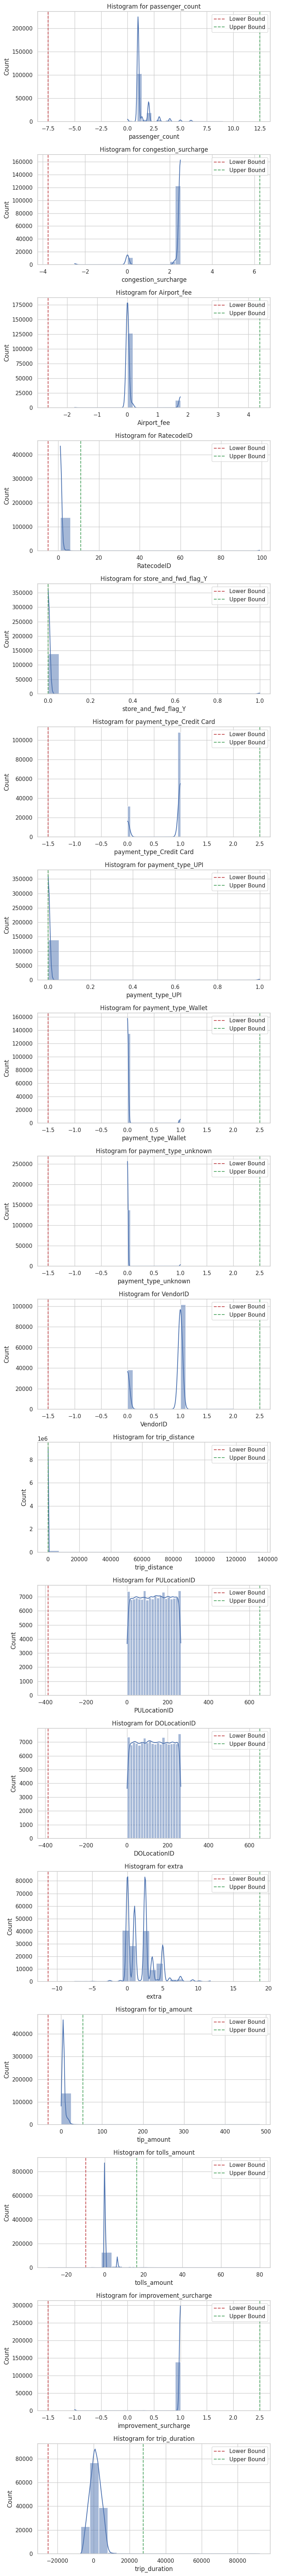

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = x_train_preprocessed

# figure with subplots
fig, axes = plt.subplots(nrows=len(data.columns), figsize=(8, 4 * len(data.columns)))


for i, column_name in enumerate(data.columns):
    # Calculate IQR
    column_data = data[column_name]
    Q1 = column_data.quantile(0.01)
    Q3 = column_data.quantile(0.99)
    IQR = Q3 - Q1

    # Identify potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # histogram with upper and lower bound lines
    sns.histplot(x=column_data, kde=True, ax=axes[i], bins=20)
    axes[i].axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
    axes[i].axvline(x=upper_bound, color='g', linestyle='--', label='Upper Bound')

    # subplot title
    axes[i].set_title(f'Histogram for {column_name}')

    # Display legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# # Function to replace outliers with lower and upper values for features
# def replace_outliers_with_range(column):
#     Q1 = column.quantile(0.01)
#     Q3 = column.quantile(0.99)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     column[column < lower_bound] = lower_bound
#     column[column > upper_bound] = upper_bound
#     return column

# # Apply the function to each numeric column in the training set
# numeric_columns = x_train_preprocessed.select_dtypes(include=['number'])
# x_train_preprocessed[numeric_columns.columns] = numeric_columns.apply(replace_outliers_with_range)

# # Apply the function to each numeric column in the validation set
# numeric_columns = x_val_preprocessed.select_dtypes(include=['number'])
# x_val_preprocessed[numeric_columns.columns] = numeric_columns.apply(replace_outliers_with_range)

# # Apply the function to each numeric column in the test set
# numeric_columns = X_test_preprocessed.select_dtypes(include=['number'])
# X_test_preprocessed[numeric_columns.columns] = numeric_columns.apply(replace_outliers_with_range)

# # Print the DataFrame with outliers replaced by lower and upper values for the test set
# X_test_preprocessed.info()

# # Function to replace outliers in the target variable with lower and upper values
# def replace_outliers_in_target(y):
#     Q1 = y.quantile(0.01)
#     Q3 = y.quantile(0.99)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     y[y < lower_bound] = lower_bound
#     y[y > upper_bound] = upper_bound
#     return y

# # Apply the function to the target variable in the training set
# y_train = replace_outliers_in_target(y_train)

# # Apply the function to the target variable in the validation set
# y_val = replace_outliers_in_target(y_val)


#### Final Check of data types

In [ ]:
x_train_preprocessed.info()

In [ ]:
x_val_preprocessed.info()

In [ ]:
X_test_preprocessed.info()

### Scaling

StandardScaler() is used for scaling of features.

**Standard Scaling**
$$
z = \frac{{x - \mu}}{{\sigma}}
$$



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.set_output(transform="pandas").fit_transform(x_train_preprocessed)
x_val_scaled = scaler.set_output(transform="pandas").transform(x_val_preprocessed)
X_test_scaled = scaler.set_output(transform="pandas").transform(X_test_preprocessed)


# Training Models

## Model - 1 : Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score , mean_squared_error

In [ ]:
linear_model = LinearRegression()

linear_model.fit(x_train_scaled, y_train)

y_val_pred1 = linear_model.predict(x_val_scaled)

r2_lr1 = r2_score(y_val_pred1, y_val)

mse_lr1 = mean_squared_error(y_val_pred1, y_val)

print("R2 Score : ", r2_lr1)
print("Mean Squared Error : ", mse_lr1)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score , mean_squared_error

#  x_train, y_train, x_val, y_val are our training and validation data and labels

# Pipeline with Linear Regression
pipeline_lr = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Parameter grid for hyperparameter tuning
param_grid_lr = {
    'regressor__fit_intercept': [True, False],
}

# GridSearchCV object
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, scoring='r2', cv=5)
grid_search_lr.fit(x_train_scaled, y_train)

# Get the best model and parameters
best_model_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_

# Make predictions on the validation set
y_val_pred_lr = best_model_lr.predict(x_val_scaled)

# Evaluate the model
r2_lr = r2_score(y_val, y_val_pred_lr)
mse_lr = mean_squared_error(y_val, y_val_pred_lr)

# Print results
print('Linear Regression Results:')
print(f'Best Hyperparameters: {best_params_lr}')
print(f'R-squared Score on Validation Data: {r2_lr:.3f}')
print("Mean Squared Error : ", mse_lr)


## ExtraTreesRegressor

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor
# model = ExtraTreesRegressor(n_estimators=300,max_depth=30, random_state= 42, min_samples_split=7)
# model.fit(X_train, Y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

## Model - 2 : XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# Create the pipeline with XGBoost Regressor
pipeline_xgb = Pipeline(steps=[
    ('regressor', XGBRegressor(random_state=42))
])


pipeline_xgb.fit(x_train_scaled , y_train)
y_val_pred_xgb = pipeline_xgb.predict(x_val_scaled)

r2_xgb = r2_score(y_val, y_val_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)

print("R2 Score : ", r2_xgb)
print("Mean Squared Error : ", mse_xgb)


# # Define the parameter grid for hyperparameter tuning
# param_grid_xgb = {
#     'regressor__n_estimators': [50, 100, 200],
#     'regressor__max_depth': [3, 5, 7],
# }

# # Create the GridSearchCV object
# grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, scoring='r2', cv=5)
# grid_search_xgb.fit(x_train, y_train)

# # Get the best model and parameters
# best_model_xgb = grid_search_xgb.best_estimator_
# best_params_xgb = grid_search_xgb.best_params_

# # Make predictions on the validation set
# y_pred_xgb = best_model_xgb.predict(x_val)

# # Evaluate the model
# r2_xgb = r2_score(y_val, y_pred_xgb)

# # Print results
# print('XGBoost Regression Results:')
# print(f'Best Hyperparameters: {best_params_xgb}')
# print(f'R-squared Score on Validation Data: {r2_xgb:.3f}')


## Model - 3 : RandomForestRegressor

In [201]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline with Random Forest Regressor
pipeline_rf = Pipeline(steps=[
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_rf.fit(x_train_scaled, y_train)

y_val_pred_rf = pipeline_rf.predict(x_val_scaled)

r2_rf = r2_score(y_val, y_val_pred_rf)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)

print("R2 Score : ", r2_rf)
print("Mean Squared Error : ", mse_rf )

# # Define the parameter grid for hyperparameter tuning
# param_grid_rf = {
#     'regressor__n_estimators': [50, 100, 200],
#     'regressor__max_depth': [None, 10, 20],
# }

# # Create the GridSearchCV object
# grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring='r2', cv=5)
# grid_search_rf.fit(x_train, y_train)

# # Get the best model and parameters
# best_model_rf = grid_search_rf.best_estimator_
# best_params_rf = grid_search_rf.best_params_

# # Make predictions on the validation set
# y_pred_rf = best_model_rf.predict(x_val)

# # Evaluate the model
# r2_rf = r2_score(y_val, y_pred_rf)

# # Print results
# print('Random Forest Regression Results:')
# print(f'Best Hyperparameters: {best_params_rf}')
# print(f'R-squared Score on Validation Data: {r2_rf:.3f}')


R2 Score :  0.9563321781866835
Mean Squared Error :  28.41719098600114


### Best Model

In [ ]:
model_wise_r2 = {
    "Linear_Regression": [r2_lr, best_model_lr],
    "Random_Forest_Regressor": [r2_rf, pipeline_rf],
    "XGBoostRegresor": [r2_xgb, pipeline_xgb]
}

best_model_name = max(model_wise_r2, key=lambda k: model_wise_r2[k][0])
best_model = model_wise_r2[best_model_name][1]  # Access the model object
best_r2 = model_wise_r2[best_model_name][0]

print(f'The best model is {best_model_name} with R-squared score: {best_r2:.3f}')

# Prediction using the best model on the test set
y_pred = best_model.predict(X_test_scaled)


# CSV For Submission

In [ ]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,len(y_pred)+1)]
submission["total_amount"] = y_pred
submission.to_csv('submission.csv',index=False)

### Final Output Check

In [202]:
submission.head()

,ID,total_amount
0,1,37.4177
1,2,26.8432
2,3,16.9092
3,4,15.2561
4,5,24.2758
